# Image Classification using Neural Networks
In this lesson, we will learn more about unstructured inputs: images.

In this notebook, we will use a public dataset, the MNIST Digit data set. This dataset contains 60,000 images (28 x 28) of digits from 0-9.

In addition, the test set contains 10,000 similar images.

### Load and explore data
Using a python package by tensorflow (keras), we can directly import the data into our local environment.

We can use matplotlib to visualise some of the images.

In [76]:
%pip install -q tensorflow


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [77]:
import tensorflow as tf
from tensorflow import keras

mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [78]:
print(train_images.shape)
print(type(train_images))

(60000, 28, 28)
<class 'numpy.ndarray'>


In [79]:
print(test_images.shape)

(10000, 28, 28)


5


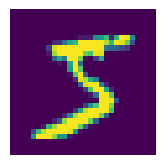

In [80]:
import matplotlib
import matplotlib.pyplot as plt

image = train_images[0]
image_pixels = image.reshape(28, 28)
plt.subplot(131)
plt.imshow(image_pixels)
plt.axis('off')

print(train_labels[0])
plt.show()

In [81]:
import numpy as np

(unique, counts) = np.unique(train_labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies


array([[   0, 5923],
       [   1, 6742],
       [   2, 5958],
       [   3, 6131],
       [   4, 5842],
       [   5, 5421],
       [   6, 5918],
       [   7, 6265],
       [   8, 5851],
       [   9, 5949]])

All classes are pretty well-balanced

### Multi-class Classification

We will try using the architecture we learnt about last time - Artificial Neural Networks (ANNs)

We will also look at a much more efficient archiecture: Convolutional Neural Networks (CNNs)

In [82]:
train_images = train_images.reshape(60000, 28, 28, 1)
print(train_images.shape)

(60000, 28, 28, 1)


In [83]:
test_images = test_images.reshape(10000, 28, 28, 1)
print(test_images.shape)

(10000, 28, 28, 1)


### Fully Connected Neural Network (ANN)

This is the architecture we learnt about last lesson. 

In [84]:
ann = keras.models.Sequential()
#Input layer
ann.add(keras.layers.Flatten(input_shape=[28, 28, 1]))

In [85]:
#Hidden Layer 1
ann.add(keras.layers.Dense(50, activation='relu'))

#Hidden Layer 2
ann.add(keras.layers.Dense(25, activation='relu'))

In [86]:
#Output layer (with softmax)
ann.add(keras.layers.Dense(10, activation='softmax'))

In [87]:
ann.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 50)                39250     
                                                                 
 dense_16 (Dense)            (None, 25)                1275      
                                                                 
 dense_17 (Dense)            (None, 10)                260       
                                                                 
Total params: 40785 (159.32 KB)
Trainable params: 40785 (159.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
ann.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [89]:
ann.fit(train_images, train_labels, epochs=20, verbose=5)

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


### Convolutional Neural Network (CNN)

This is the most commonly used architecture for image classification. 

Learn more about this architecture in this lesson's video: https://youtu.be/DbClQQZujxA

In [90]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(4, (4, 4), strides=2, activation='relu', input_shape=(28, 28, 1)))
cnn.add(keras.layers.MaxPooling2D((2, 2)))

In [91]:
cnn.add(keras.layers.Flatten())
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 13, 13, 4)         68        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 4)           0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 144)               0         
                                                                 
Total params: 68 (272.00 Byte)
Trainable params: 68 (272.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
cnn.add(keras.layers.Dense(50, activation='relu'))
cnn.add(keras.layers.Dense(25, activation='relu'))
cnn.add(keras.layers.Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 13, 13, 4)         68        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 4)           0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 144)               0         
                                                                 
 dense_18 (Dense)            (None, 50)                7250      


                                                                 
 dense_19 (Dense)            (None, 25)                1275      
                                                                 
 dense_20 (Dense)            (None, 10)                260       
                                                                 
Total params: 8853 (34.58 KB)
Trainable params: 8853 (34.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Benefits of CNNs

Despite having a more complex architecture = more complex patterns, the number of parameters in a CNN are fewer (almost one-fourth).

|Architecture|HL 1|HL 2|Parameters|
|------------|----|----|----------|
|ANN|50|25|40785|
|CNN|50|25|8853|


In [93]:
cnn.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [94]:
cnn.fit(train_images, train_labels, epochs=20, verbose=5)

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [95]:
cnn.save("../backend/model/test-model.h5")

In [96]:
loaded_model = tf.keras.models.load_model("../backend/model/test-model.h5")

In [97]:
print(loaded_model.evaluate(test_images, test_labels))

313/313 [==============================] - 0s 481us/step - loss: 0.1491 - accuracy: 0.9693
[0.14907628297805786, 0.9692999720573425]


### Evaluating the Models

Since the problem is multi-class classification, we will only look at Accuracy

In [98]:
ann_score = ann.evaluate(test_images, test_labels)
print(f"ANN Accuracy: {ann_score[1]}")

313/313 [==============================] - 0s 372us/step - loss: 0.5015 - accuracy: 0.9444
ANN Accuracy: 0.9444000124931335


In [99]:
cnn_score = cnn.evaluate(test_images, test_labels)
print(f"CNN Accuracy: {cnn_score[1]}")

313/313 [==============================] - 0s 461us/step - loss: 0.1491 - accuracy: 0.9693
CNN Accuracy: 0.9692999720573425
